# True function

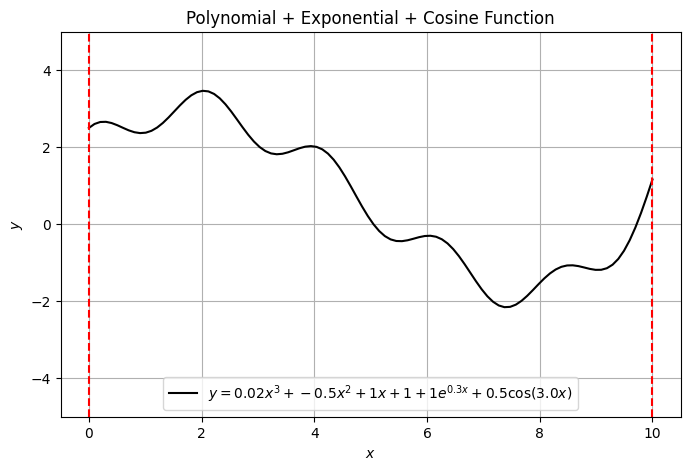

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Design space
x = np.linspace(0, 10, 100)

# Coefficients for the polynomial, exponential, and cosine terms
a, b, c, d = 0.02, -0.5, 1, 1  # Polynomial coefficients
e, f = 1, 0.3  # Exponential term coefficients
g, h = 0.5, 3  # Cosine term coefficients

# Function definition
y = a*x**3 + b*x**2 + c*x + d + e*np.exp(f*x) + g*np.cos(h*x)

# Plot
fig, ax = plt.subplots(figsize=(8,5))

# Updated LaTeX label with numerical values
label_str = rf"$y = {a}x^3 + {b}x^2 + {c}x + {d} + {e} e^{{{f:.1f}x}} + {g} \cos({h:.1f}x)$"
ax.plot(x, y, label=label_str, color='k')

# Vertical dashed lines at x=0 and x=10
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

# Labels and title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Polynomial + Exponential + Cosine Function")

# Legend and grid
ax.legend()
ax.grid(True)
ax.set_ylim([-5,5])

plt.show()
plt.close()

# Random Sampling

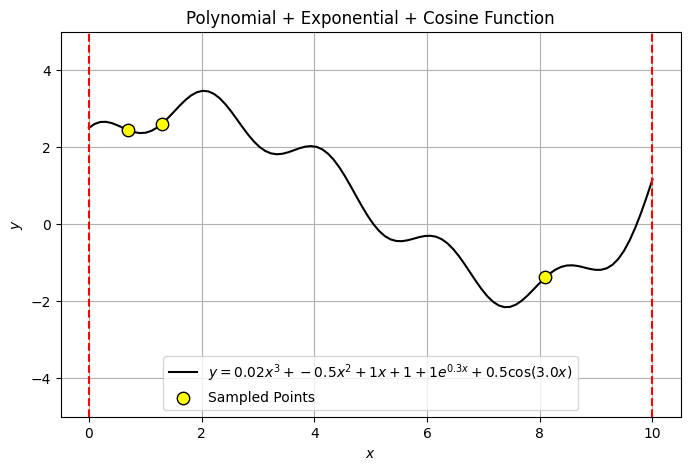

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Design space
x_sample = np.array([0.7, 1.3, 8.1])  # 샘플링할 x 값

# Sampling the y values (True function is assumed unknown)
y_sample = a*x_sample**3 + b*x_sample**2 + c*x_sample + d + e*np.exp(f*x_sample) + g*np.cos(h*x_sample)

# Plot
fig, ax = plt.subplots(figsize=(8,5))

# Updated LaTeX label with numerical values
label_str = rf"$y = {a}x^3 + {b}x^2 + {c}x + {d} + {e} e^{{{f:.1f}x}} + {g} \cos({h:.1f}x)$"
ax.plot(x, y, label=label_str, color='k')

ax.scatter(x_sample, y_sample, color='yellow', edgecolors='k', 
           label="Sampled Points", zorder=3, s=80)

# Vertical dashed lines at x=0 and x=10
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

# Labels and title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Polynomial + Exponential + Cosine Function")

# Legend and grid
ax.legend()
ax.grid(True)
ax.set_ylim([-5,5])

plt.show()
plt.close()


# Fitting

coeffs : [-0.11762076  0.51830757  2.13793388]


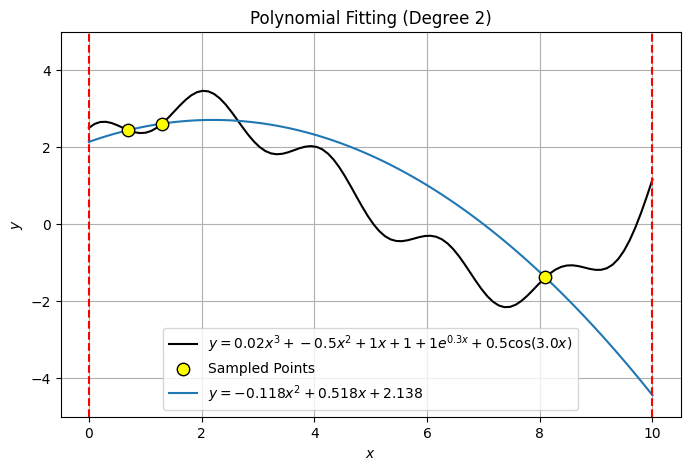

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Design space
x_sample = np.array([0.7, 1.3, 8.1])  # 샘플링할 x 값

# Sampling the y values (True function is assumed unknown)
y_sample = a*x_sample**3 + b*x_sample**2 + c*x_sample + d + e*np.exp(f*x_sample) + g*np.cos(h*x_sample)

# 다항식 피팅 (차수: 2차)
degree = 2  # x^2, x^1, x^0
coeffs = np.polyfit(x_sample, y_sample, degree)
print(f'coeffs : {coeffs}')

# 피팅된 다항식 함수 생성
a2, a1, a0 = coeffs
fitted_poly = np.poly1d([a2, a1, a0])

# 전체 x 범위에서 피팅된 함수 평가
x_fit = np.linspace(0, 10, 100)
y_fit = fitted_poly(x_fit)

# 플로팅
fig, ax = plt.subplots(figsize=(8,5))

# Updated LaTeX label with numerical values
label_str = rf"$y = {a}x^3 + {b}x^2 + {c}x + {d} + {e} e^{{{f:.1f}x}} + {g} \cos({h:.1f}x)$"
ax.plot(x, y, label=label_str, color='k')

ax.scatter(x_sample, y_sample, color='yellow', edgecolors='k', 
           label="Sampled Points", zorder=3, s=80)

# 피팅된 다항식 플롯
ax.plot(x_fit, y_fit, label=rf"$y = {a2:.3f}x^2 + {a1:.3f}x + {a0:.3f}$")

# x=0, x=10 빨간 점선 추가
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

# Labels & Title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Polynomial Fitting (Degree 2)")

# Legend & Grid
ax.legend()
ax.grid(True)
ax.set_ylim([-5,5])

plt.show()
plt.close()


# 데이터 샘플링을 균일하게!

## Latin Hypercube Sampling (LHS)

coeffs : [ 0.08192309 -1.4638772   5.37315394]


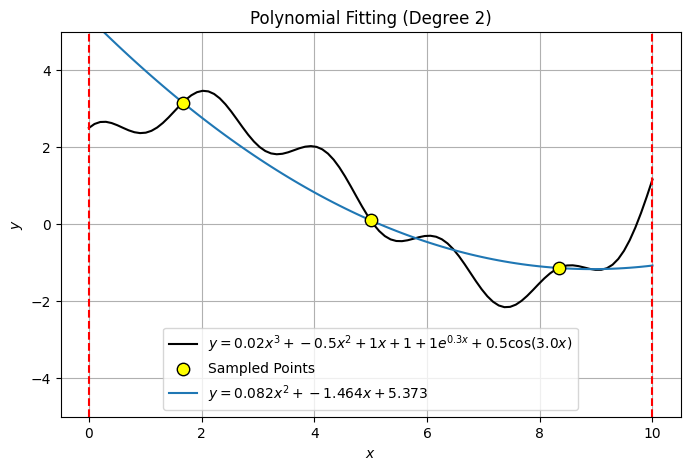

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS  # LHS 샘플링 모듈

# LHS 샘플링을 통한 x 값 선택 (0~10 범위에서 6개 샘플링)
sampling = LHS(xlimits=np.array([[0, 10]]))  # 샘플링 범위 설정
x_sample = sampling(3).flatten()  # LHS로 6개 샘플 생성

# Sampling the y values (True function is assumed unknown)
y_sample = a*x_sample**3 + b*x_sample**2 + c*x_sample + d + e*np.exp(f*x_sample) + g*np.cos(h*x_sample)

# 다항식 피팅 (차수: 2차)
degree = 2  # x^2, x^1, x^0
coeffs = np.polyfit(x_sample, y_sample, degree)
print(f'coeffs : {coeffs}')

# 피팅된 다항식 함수 생성
a2, a1, a0 = coeffs
fitted_poly = np.poly1d([a2, a1, a0])

# 전체 x 범위에서 피팅된 함수 평가
x_fit = np.linspace(0, 10, 100)
y_fit = fitted_poly(x_fit)

# 플로팅
fig, ax = plt.subplots(figsize=(8,5))

# Updated LaTeX label with numerical values
label_str = rf"$y = {a}x^3 + {b}x^2 + {c}x + {d} + {e} e^{{{f:.1f}x}} + {g} \cos({h:.1f}x)$"
ax.plot(x, y, label=label_str, color='k')

ax.scatter(x_sample, y_sample, color='yellow', edgecolors='k',
           label="Sampled Points", zorder=3, s=80)

# 피팅된 다항식 플롯
ax.plot(x_fit, y_fit, label=rf"$y = {a2:.3f}x^2 + {a1:.3f}x + {a0:.3f}$")

# x=0, x=10 빨간 점선 추가
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

# Labels & Title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Polynomial Fitting (Degree 2)")

# Legend & Grid
ax.legend()
ax.grid(True)
ax.set_ylim([-5,5])

plt.show()
plt.close()


# 다항식 근사 차수를 증가시켜서!

## 0th ~ nth order polynomial

C:\Users\Desktop_M4_7\AppData\Local\Temp\ipykernel_27612\2852976880.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_sample, y_sample, degree)
C:\Users\Desktop_M4_7\AppData\Local\Temp\ipykernel_27612\2852976880.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_sample, y_sample, degree)


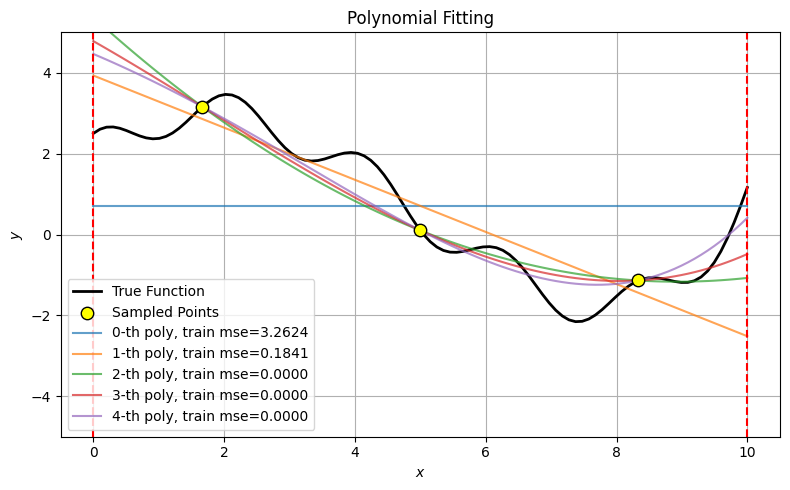

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS  # LHS 샘플링 모듈

# LHS 샘플링을 통한 x 값 선택 (0~10 범위에서 6개 샘플링)
sampling = LHS(xlimits=np.array([[0, 10]]))  # 샘플링 범위 설정
x_sample = sampling(3).flatten()  # LHS로 6개 샘플 생성

# Sampling the y values (True function is assumed unknown)
y_sample = a*x_sample**3 + b*x_sample**2 + c*x_sample + d + e*np.exp(f*x_sample) + g*np.cos(h*x_sample)


# 플로팅
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, label="True Function", color='k', linewidth=2)
ax.scatter(x_sample, y_sample, color='yellow', edgecolors='k', 
           label="Sampled Points", zorder=3, s=80)

# Degree 0 ~ n 까지 다항식 피팅 및 플로팅
n=5
for degree in range(n):
    # 다항식 피팅
    coeffs = np.polyfit(x_sample, y_sample, degree)
    fitted_poly = np.poly1d(coeffs)

    # Train set MSE 계산 (샘플링된 지점에서의 MSE)
    y_sample_pred = fitted_poly(x_sample)
    mse = np.mean((y_sample - y_sample_pred) ** 2)

    # 전체 x 범위에서 피팅된 함수 평가
    y_fit = fitted_poly(x)

    # 피팅된 다항식 플롯
    ax.plot(x, y_fit, label=rf"{degree}-th poly, train mse={mse:.4f}", alpha=0.7)

# x=0, x=10 빨간 점선 추가
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

# Labels & Title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Polynomial Fitting")

# Legend & Grid
ax.legend(loc="lower left") # , bbox_to_anchor=(1, 1)
ax.grid(True)
ax.set_ylim([-5,5])

# 레이아웃 조정 (Legend 겹침 방지)
plt.tight_layout()
plt.show()
plt.close()


# 학습 데이터 개수를 늘려서!

## 3 points to 6 points

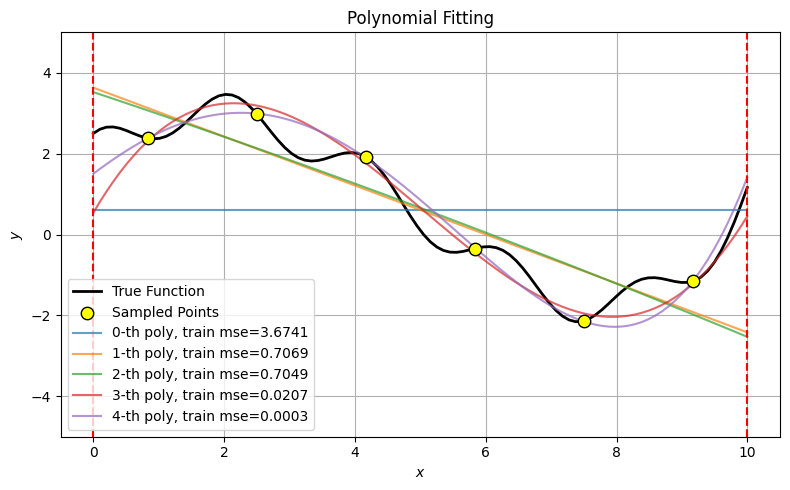

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS  # LHS 샘플링 모듈

# LHS 샘플링을 통한 x 값 선택 (0~10 범위에서 6개 샘플링)
sampling = LHS(xlimits=np.array([[0, 10]]))  # 샘플링 범위 설정
x_sample = sampling(6).flatten()  # LHS로 6개 샘플 생성
y_sample = a*x_sample**3 + b*x_sample**2 + c*x_sample + d + e*np.exp(f*x_sample) + g*np.cos(h*x_sample)


# 플로팅
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, label="True Function", color='k', linewidth=2)
ax.scatter(x_sample, y_sample, color='yellow', edgecolors='k', 
           label="Sampled Points", zorder=3, s=80)

# Degree 0 ~ n 까지 다항식 피팅 및 플로팅
n=5
for degree in range(n):
    # 다항식 피팅
    coeffs = np.polyfit(x_sample, y_sample, degree)
    fitted_poly = np.poly1d(coeffs)

    # Train set MSE 계산 (샘플링된 지점에서의 MSE)
    y_sample_pred = fitted_poly(x_sample)
    mse = np.mean((y_sample - y_sample_pred) ** 2)

    # 전체 x 범위에서 피팅된 함수 평가
    y_fit = fitted_poly(x)

    # 피팅된 다항식 플롯
    ax.plot(x, y_fit, label=rf"{degree}-th poly, train mse={mse:.4f}", alpha=0.7)

# x=0, x=10 빨간 점선 추가
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

# Labels & Title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Polynomial Fitting")

# Legend & Grid
ax.legend(loc="lower left") # , bbox_to_anchor=(1, 1)
ax.grid(True)
ax.set_ylim([-5,5])

# 레이아웃 조정 (Legend 겹침 방지)
plt.tight_layout()
plt.show()
plt.close()


# 학습과 평가 데이터를 나누어서 하이퍼 파라미터 최적화!

## 4 points for train - 2 points for test with 3 Folds

C:\Users\Desktop_M4_7\AppData\Local\Temp\ipykernel_27612\2340976174.py:43: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, degree)


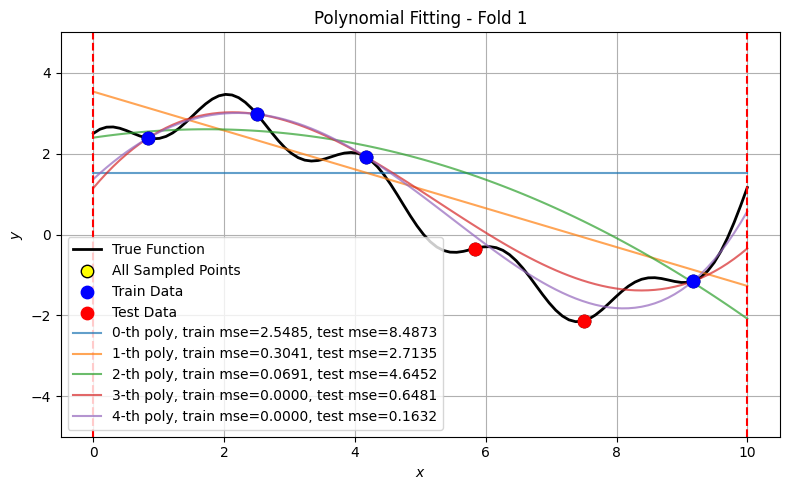

C:\Users\Desktop_M4_7\AppData\Local\Temp\ipykernel_27612\2340976174.py:43: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, degree)


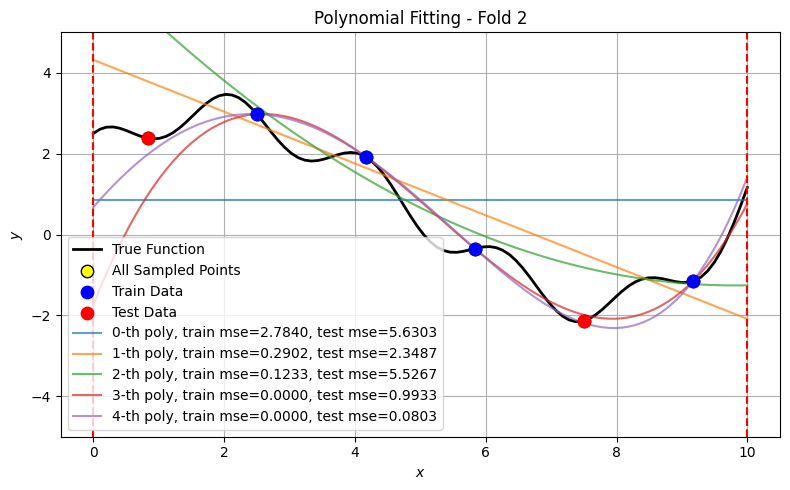

C:\Users\Desktop_M4_7\AppData\Local\Temp\ipykernel_27612\2340976174.py:43: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, degree)


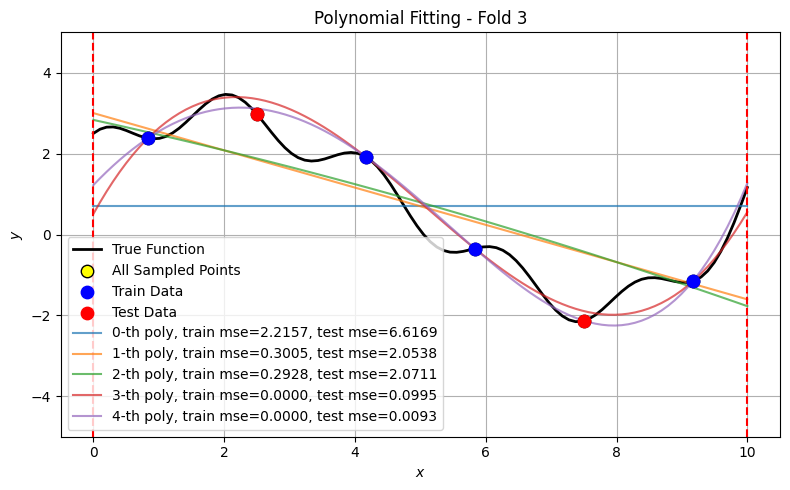


=== Cross Validation Results ===
Degree 0: Avg Train MSE = 2.5161, Avg Test MSE = 6.9115
Degree 1: Avg Train MSE = 0.2983, Avg Test MSE = 2.3720
Degree 2: Avg Train MSE = 0.1617, Avg Test MSE = 4.0810
Degree 3: Avg Train MSE = 0.0000, Avg Test MSE = 0.5803
Degree 4: Avg Train MSE = 0.0000, Avg Test MSE = 0.0843

Best Model: 4-th order polynomial with Avg Test MSE = 0.0843


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS  # LHS 샘플링 모듈
from itertools import combinations

# LHS 샘플링 (0~10 범위에서 6개 샘플)
sampling = LHS(xlimits=np.array([[0, 10]]))
x_sample = sampling(6).flatten()
y_sample = a*x_sample**3 + b*x_sample**2 + c*x_sample + d + e*np.exp(f*x_sample) + g*np.cos(h*x_sample)

# N-Fold Cross Validation을 위한 train-test split 조합 생성
n_folds=3
indices = np.arange(len(x_sample))
folds = list(combinations(indices, 2))[:n_folds]  # 3개의 서로 다른 2개짜리 test set 선택

# MSE 저장용 리스트
train_mse_all = {deg: [] for deg in range(5)}
test_mse_all = {deg: [] for deg in range(5)}

# 3개의 폴드 실행
for i, test_idx in enumerate(folds):
    train_idx = np.setdiff1d(indices, test_idx)  # Test 데이터를 제외한 나머지를 Train으로 사용

    # Train/Test 데이터 설정
    x_train, y_train = x_sample[train_idx], y_sample[train_idx]
    x_test, y_test = x_sample[np.array(test_idx)], y_sample[np.array(test_idx)]

    # 플로팅 (각 폴드별 figure 생성)
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # True function plot
    ax.plot(x, y, label="True Function", color='k', linewidth=2)

    # 샘플링된 데이터 점
    ax.scatter(x_sample, y_sample, color='yellow', edgecolors='k', 
               label="All Sampled Points", zorder=3, s=80)
    ax.scatter(x_train, y_train, color='blue', label="Train Data", zorder=3, s=80)
    ax.scatter(x_test, y_test, color='red', label="Test Data", zorder=3, s=80)

    # 다항식 차수별 피팅
    for degree in range(5):
        # 다항식 피팅 (Train 데이터만 사용)
        coeffs = np.polyfit(x_train, y_train, degree)
        fitted_poly = np.poly1d(coeffs)

        # Train/Test 데이터에서 예측값 계산
        y_train_pred = fitted_poly(x_train)
        y_test_pred = fitted_poly(x_test)

        # Train/Test MSE 계산
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)

        # MSE 저장
        train_mse_all[degree].append(train_mse)
        test_mse_all[degree].append(test_mse)

        # 전체 x 범위에서 피팅된 함수 평가 (플로팅용)
        y_fit = fitted_poly(x)

        # 피팅된 다항식 플롯 (MSE 포함된 label)
        ax.plot(x, y_fit, label=rf"{degree}-th poly, train mse={train_mse:.4f}, test mse={test_mse:.4f}", alpha=0.7)

    # x=0, x=10 빨간 점선 추가
    ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
    ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

    # Labels & Title
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_title(f"Polynomial Fitting - Fold {i+1}")

    # Legend & Grid
    ax.legend(loc="lower left")
    ax.grid(True)
    ax.set_ylim([-5,5])
    
    # 레이아웃 조정 (Legend 겹침 방지)
    plt.tight_layout()
    plt.show()
    plt.close()

# 평균 test MSE 계산 및 최적 모델 찾기
avg_test_mse = {deg: np.mean(test_mse_all[deg]) for deg in range(5)}
best_degree = min(avg_test_mse, key=avg_test_mse.get)

# 최적 모델 출력
print("\n=== Cross Validation Results ===")
for degree in range(5):
    print(f"Degree {degree}: Avg Train MSE = {np.mean(train_mse_all[degree]):.4f}, Avg Test MSE = {avg_test_mse[degree]:.4f}")

print(f"\nBest Model: {best_degree}-th order polynomial with Avg Test MSE = {avg_test_mse[best_degree]:.4f}")


# 결과

## 최종적으로 모든 데이터를 best model 에 학습

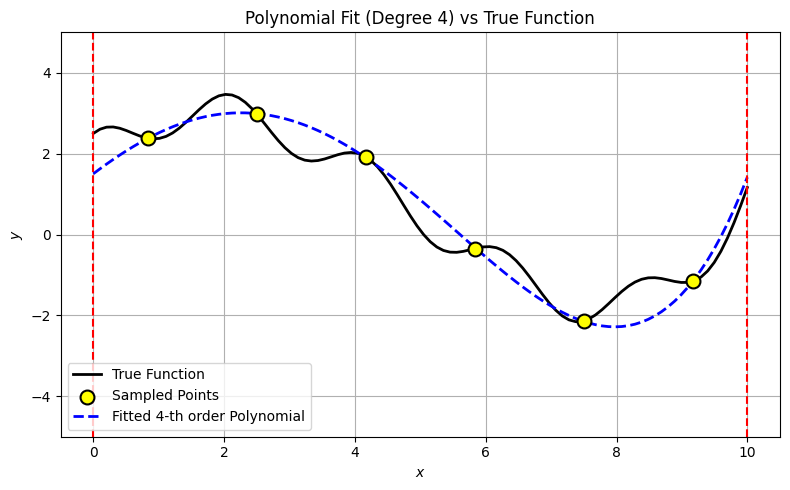

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS  # LHS 샘플링 모듈

# LHS 샘플링 (0~10 범위에서 6개 샘플)
sampling = LHS(xlimits=np.array([[0, 10]]))
x_sample = sampling(6).flatten()
y_sample = a*x_sample**3 + b*x_sample**2 + c*x_sample + d + e*np.exp(f*x_sample) + g*np.cos(h*x_sample)

# 최적의 degree=4로 다항식 피팅
degree = 4
coeffs = np.polyfit(x_sample, y_sample, degree)
fitted_poly = np.poly1d(coeffs)

# 전체 x 범위에서 피팅된 함수 평가
y_pred = fitted_poly(x)

# 플로팅
fig, ax = plt.subplots(figsize=(8, 5))

# True function plot
ax.plot(x, y, label="True Function", color='k', linewidth=2)
# 샘플링된 데이터 점 (노란색, 검은색 테두리)
ax.scatter(x_sample, y_sample, color='yellow', edgecolors='k', 
           label="Sampled Points", zorder=3, s=100, linewidth=1.5)

# 예측된 다항식 플롯
ax.plot(x, y_pred, label=rf"Fitted 4-th order Polynomial", 
        color='b', linestyle='--', linewidth=2)


# x=0, x=10 빨간 점선 추가
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5)
ax.axvline(x=10, linestyle="--", color="r", linewidth=1.5)

# Labels & Title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title(f"Polynomial Fit (Degree {degree}) vs True Function")

# Legend & Grid
ax.legend(loc="lower left")
ax.grid(True)
ax.set_ylim([-5,5])

# 레이아웃 조정
plt.tight_layout()
plt.show()
plt.close()
